In [98]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [99]:
FILE_PATH = os.path.join("dataset", "main_data.csv")
df = pd.read_csv(FILE_PATH)

In [100]:
col = ['trip_id', 'start_stop_id', 'arrival_time', 'stop_sequence_x', 'stop_lat', 'stop_lon', 'route_id', 'direction_id', 'speed_kmh', 'segment_max_speed_kmh', 'runtime_sec', 'end_stop_id']
df = df[col]

In [109]:
df['arrival_time'] = pd.to_datetime(df['arrival_time'].dt.strftime('%H:%M:%S'))

In [108]:
df['arrival_time'] = pd.to_datetime(df['arrival_time'])

In [110]:
df = df.sort_values(by=['direction_id', 'trip_id'], ascending=[True, True])

In [111]:
df['decisive_speed'] = df.apply(lambda row, weight = random.uniform(0.8, 0.9):(row['speed_kmh'] * weight + row['segment_max_speed_kmh'] * (1 - weight)), axis=1)

In [112]:
conditions = [
    (df['decisive_speed'] > 40),
    (df['decisive_speed'] > 30),
    (df['decisive_speed'] > 20),
    (df['decisive_speed'] > 15)
]

congestion_levels = [0, 1, 2, 3]

# Use np.select to create the new 'congestion_level' column
df['congestion_level'] = pd.np.select(conditions, congestion_levels, default=4)

C:\Users\vinhn\AppData\Local\Temp\ipykernel_14800\1848422047.py:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['congestion_level'] = pd.np.select(conditions, congestion_levels, default=4)


In [113]:
df = df.drop(['decisive_speed'], axis = 1)

In [114]:
df = df.drop_duplicates()

In [115]:
df

,trip_id,start_stop_id,arrival_time,stop_sequence_x,stop_lat,stop_lon,route_id,direction_id,speed_kmh,segment_max_speed_kmh,runtime_sec,end_stop_id,congestion_level
3,0-25-003-3452.2.21:191400-44-189_C79F9340-8B4E...,2360,2023-10-16 19:15:00,2,51.167915,7.081023,300025,0,4.0,4.000000,360.0,3452,4
9,0-25-003-3452.2.21:191400-44-189_C79F9340-8B4E...,8956,2023-10-16 19:16:00,3,51.163758,7.079510,300025,0,29.0,29.000000,60.0,2360,2
15,0-25-003-3452.2.21:191400-44-189_C79F9340-8B4E...,3451,2023-10-16 19:17:00,4,51.161681,7.077661,300025,0,16.0,16.000000,60.0,8956,3
21,0-25-003-3452.2.21:191400-44-189_C79F9340-8B4E...,7772,2023-10-16 19:18:00,5,51.158978,7.074396,300025,0,32.0,32.000000,60.0,3451,1
27,0-25-003-3452.2.21:191400-44-189_C79F9340-8B4E...,5297,2023-10-16 19:19:00,6,51.156805,7.070200,300025,0,23.0,23.000000,60.0,7772,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45528,999004-379-003-3224.2.22:091200-23-63_D99863AB...,3294,2023-10-16 09:28:00,16,51.058484,7.165881,1900379,1,40.0,40.000000,60.0,3295,1
45532,999004-379-003-3224.2.22:091200-23-63_D99863AB...,3295,2023-10-16 09:29:00,17,51.058096,7.157027,1900379,1,24.3,24.275299,0.0,3296,2
45536,999004-379-003-3224.2.22:091200-23-63_D99863AB...,3296,2023-10-16 09:29:00,18,51.059393,7.152181,1900379,1,39.0,39.000000,240.0,3226,1
45540,999004-379-003-3224.2.22:091200-23-63_D99863AB...,3226,2023-10-16 09:33:00,19,51.052749,7.129311,1900379,1,46.0,47.000000,120.0,3225,0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15842 entries, 3 to 45544
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trip_id                15842 non-null  object        
 1   start_stop_id          15842 non-null  int64         
 2   arrival_time           15842 non-null  datetime64[ns]
 3   stop_sequence_x        15842 non-null  int64         
 4   stop_lat               15842 non-null  float64       
 5   stop_lon               15842 non-null  float64       
 6   route_id               15842 non-null  int64         
 7   direction_id           15842 non-null  int64         
 8   speed_kmh              15842 non-null  float64       
 9   segment_max_speed_kmh  15842 non-null  float64       
 10  runtime_sec            15842 non-null  float64       
 11  end_stop_id            15842 non-null  int64         
 12  congestion_level       15842 non-null  int32         
dtypes

In [131]:
grouped = df.groupby(['trip_id', 'direction_id'])

# Create a dictionary of subdatasets based on 'trip_id' and 'direction_id'
subdatasets = {group_name: group_df for group_name, group_df in grouped}

dataset = []
# Access the subdatasets as needed
for key, subdataset in subdatasets.items():
    # print(f"Subdataset for {key}:")
    # Reset the index of the subdataset
    subdataset = subdataset.reset_index(drop=True)
    
    calculated_arrival_times = []

    for idx in range(len(subdataset)):
        if idx < 1:
            # For the first two rows, use the original 'arrival_time' values
            calculated_arrival_times.append(subdataset['arrival_time'].iloc[idx])
        else:
            # For subsequent rows, calculate the 'arrival_time' based on the two previous rows
            previous_arrival_time = calculated_arrival_times[idx - 1]
            previous_runtime = subdataset['runtime_sec'].iloc[idx - 1]
            new_arrival_time = previous_arrival_time + pd.to_timedelta(previous_runtime, unit='s') 
            calculated_arrival_times.append(new_arrival_time)

    # Replace the original 'arrival_time' column with the calculated values
    subdataset['arrival_time'] = calculated_arrival_times
    dataset.append(subdataset)

# Concatenate all subdatasets into one dataset
merged_dataset = pd.concat(dataset, ignore_index=True)

# Reset the index of the merged dataset
merged_dataset.reset_index(drop=True, inplace=True)


In [135]:
merged_dataset.head(50)

,trip_id,start_stop_id,arrival_time,stop_sequence_x,stop_lat,stop_lon,route_id,direction_id,speed_kmh,segment_max_speed_kmh,runtime_sec,end_stop_id,congestion_level
0,0-25-003-3452.2.21:191400-44-189_C79F9340-8B4E...,2360,2023-10-16 19:15:00.000000000,2,51.167915,7.081023,300025,0,4.0,4.000000,360.000000,3452,4
1,0-25-003-3452.2.21:191400-44-189_C79F9340-8B4E...,8956,2023-10-16 19:21:00.000000000,3,51.163758,7.079510,300025,0,29.0,29.000000,60.000000,2360,2
2,0-25-003-3452.2.21:191400-44-189_C79F9340-8B4E...,3451,2023-10-16 19:22:00.000000000,4,51.161681,7.077661,300025,0,16.0,16.000000,60.000000,8956,3
3,0-25-003-3452.2.21:191400-44-189_C79F9340-8B4E...,7772,2023-10-16 19:23:00.000000000,5,51.158978,7.074396,300025,0,32.0,32.000000,60.000000,3451,1
4,0-25-003-3452.2.21:191400-44-189_C79F9340-8B4E...,5297,2023-10-16 19:24:00.000000000,6,51.156805,7.070200,300025,0,23.0,23.000000,60.000000,7772,2
5,0-25-003-3452.2.21:191400-44-189_C79F9340-8B4E...,3450,2023-10-16 19:25:00.000000000,7,51.154290,7.066125,300025,0,24.0,24.000000,60.000000,5297,2
6,0-25-003-3452.2.21:191400-44-189_C79F9340-8B4E...,3449,2023-10-16 19:26:00.000000000,8,51.151736,7.055332,300025,0,51.0,51.000000,60.000000,3450,0
7,0-25-003-3452.2.21:191400-44-189_C79F9340-8B4E...,2636,2023-10-16 19:27:00.000000000,9,51.150643,7.050905,300025,0,55.0,55.000000,60.000000,3449,0
8,0-25-003-3452.2.21:191400-44-189_C79F9340-8B4E...,3448,2023-10-16 19:28:00.000000000,10,51.148841,7.045405,300025,0,26.0,26.000000,60.000000,2636,2
9,0-25-003-3452.2.21:191400-44-189_C79F9340-8B4E...,3447,2023-10-16 19:29:00.000000000,11,51.146150,7.029510,300025,0,37.0,37.000000,120.000000,3448,1


In [136]:
df = merged_dataset

In [137]:
df.to_csv("test.csv", index=False)

Epoch 1/50
317/317 [==============================] - 11s 8ms/step - loss: 1.6075 - val_loss: 1.5135
Epoch 2/50
317/317 [==============================] - 1s 5ms/step - loss: 1.5212 - val_loss: 1.5071
Epoch 3/50
317/317 [==============================] - 1s 5ms/step - loss: 1.5191 - val_loss: 1.5086
Epoch 4/50
317/317 [==============================] - 1s 4ms/step - loss: 1.5206 - val_loss: 1.4996
Epoch 5/50
317/317 [==============================] - 1s 4ms/step - loss: 1.5181 - val_loss: 1.5337
Epoch 6/50
317/317 [==============================] - 1s 4ms/step - loss: 1.5195 - val_loss: 1.4960
Epoch 7/50
317/317 [==============================] - 1s 4ms/step - loss: 1.5189 - val_loss: 1.5306
Epoch 8/50
317/317 [==============================] - 1s 4ms/step - loss: 1.5223 - val_loss: 1.4987
Epoch 9/50
317/317 [==============================] - 1s 4ms/step - loss: 1.5179 - val_loss: 1.5015
Epoch 10/50
317/317 [==============================] - 1s 4ms/step - loss: 1.5162 - val_loss: 1.500

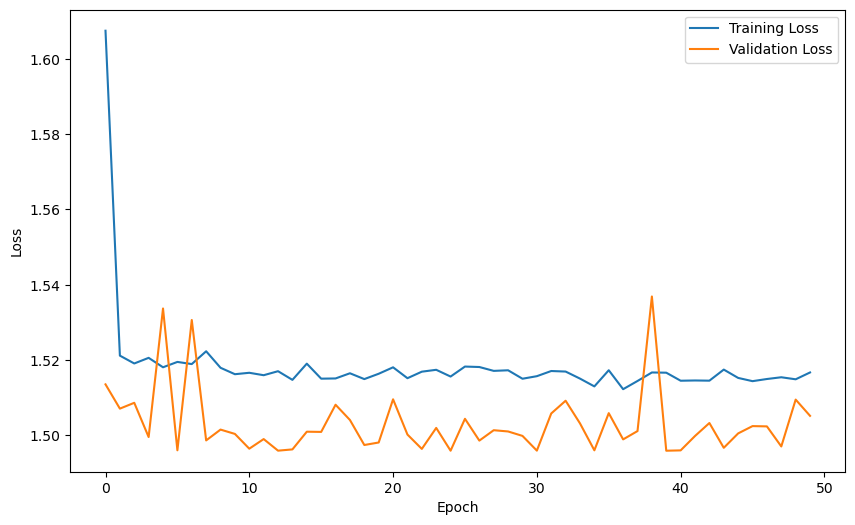

In [138]:
df['arrival_time'] = pd.to_datetime(df['arrival_time']).apply(lambda x: x.timestamp()) 

# Define your sequence length (number of time steps per sequence)
sequence_length = 10

# Select relevant features (including 'arrival_time')
selected_features = ['arrival_time', 'stop_lat', 'stop_lon', 'speed_kmh', 'segment_max_speed_kmh', 'runtime_sec']

# Normalize the selected features
scaler = StandardScaler()
df[selected_features[1:]] = scaler.fit_transform(df[selected_features[1:]])

# Create sequences of data
def create_sequences(df, sequence_length):
    sequences = []
    for i in range(len(df) - sequence_length + 1):
        sequence = df.iloc[i:i + sequence_length]
        sequences.append(sequence.values)
    return np.array(sequences)

# Create sequences for training
sequences = create_sequences(df[selected_features], sequence_length)

# Define target variable
target = df['congestion_level'].values[sequence_length - 1:]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, target, test_size=0.2, random_state=42)

# Build the LSTM model
model = keras.Sequential([
    keras.layers.LSTM(64, input_shape=(sequence_length, len(selected_features)), return_sequences=True),
    keras.layers.LSTM(64),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Make predictions
predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()